# Análise de Dados sobre informações de pessoas do TCE-RN


A seguinte análise tem o propósito de levantar números com relação as pessoas que trabalham no TCE-RN. A metodologia foi coletar dados da página de lista de pessoa assim como o salário da transparência do TCE-RN.

Reitero que todos os dados aqui expostos são públicos (salários).

#### Autor: Marco Olimpio - DIn

#### Carga de Dados


A partir da página da Área Restrita foram retiradas informações como Diretoria, andar, cargo. Com relação à remuneração foi utilizado a página da transparência do TCE-RN para relacionar essas informações com as pessoasl de cada unidade.

In [48]:
#Loading libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importing Bokeh library, updated to version 0.12.9
from bokeh.io import push_notebook, show, output_notebook, output_file
from bokeh.layouts import row
from bokeh.plotting import figure
from bokeh.sampledata.commits import data

from bokeh.models import (
    GMapPlot, GMapOptions, ColumnDataSource, Circle, DataRange1d, PanTool, WheelZoomTool, BoxSelectTool, Jitter
)
from bokeh.core.properties import field

#Inline matplotlib
%matplotlib inline
#Inline bokeh charts
output_notebook()

Loading BokehJS ...

In [99]:
pessoas_tce = pd.read_csv("PESSOAL_TCE_RN.csv",sep=',')
salarios_tce = pd.read_csv("Salarios_TCE_RN.csv",sep=",")

In [112]:
pessoas_tce['nome'] = pessoas_tce['nome'].str.upper()

pessoas_tce

,nome,GENERO,matricula,CARGO,FUNÇÃO,setor,subsetor,andar,telefone,tipo_cargo,DA_CASA,remuneração,NÍVEL_CARGO,MAIOR_NIVEL_INSTRUCAO_PESSOA
0,ANA MARIA DE MELO MARTINS,FEMININO,96270,À DISPOSIÇÃO,À DISPOSIÇÃO,DAE,DAE,1,36427350.0,À DISPOSIÇÃO,0,0.0,NaN,NaN
1,ANA PAULA LIMA DO NASCIMENTO BRITO,FEMININO,12633,À DISPOSIÇÃO,À DISPOSIÇÃO,DAG,PESSOAL,2,36427353.0,À DISPOSIÇÃO,0,0.0,NaN,NaN
2,BELCHIOR LINHARES DA SILVA,MASCULINO,95826,À DISPOSIÇÃO,À DISPOSIÇÃO,GAB.CONS. PAULO ROBERTO,GAB.CONS. PAULO ROBERTO,11,36427266.0,À DISPOSIÇÃO,0,0.0,NaN,NaN
3,CAIO CÉSAR FONSECA DE SÁ LEITÃO,MASCULINO,10.029-3,À DISPOSIÇÃO,À DISPOSIÇÃO,GAB.CONS. POTI JUNIOR,GAB.CONS. POTI JUNIOR,10,36427308.0,À DISPOSIÇÃO,0,0.0,NaN,NaN
4,CLAUDIO HENRIQUE MILANEZ DE MOURA,MASCULINO,97039,À DISPOSIÇÃO,À DISPOSIÇÃO,STM,STM,1,36427352.0,À DISPOSIÇÃO,0,0.0,NaN,NaN
5,EUDE OLIVEIRA LOURENÇO,MASCULINO,100404,À DISPOSIÇÃO,À DISPOSIÇÃO,DE,DE,L,36427376.0,À DISPOSIÇÃO,0,0.0,NaN,NaN
6,FABIOLA GONÇALVES DE MEDEIROS,FEMININO,99805,À DISPOSIÇÃO,À DISPOSIÇÃO,SETOR MÉDICO,SETOR MÉDICO,1,36427362.0,À DISPOSIÇÃO,0,0.0,NaN,NaN
7,FRANCISCO DANIEL DE BRITO,MASCULINO,9795-0,À DISPOSIÇÃO,À DISPOSIÇÃO,DE,DE,L,36427383.0,À DISPOSIÇÃO,0,0.0,NaN,NaN
8,GILIANO GUERRA OLEGÁRIO,MASCULINO,1000-6,À DISPOSIÇÃO,À DISPOSIÇÃO,ASSESSORIA DE SEGURANÇA,ASSESSORIA DE SEGURANÇA,SS,36427387.0,À DISPOSIÇÃO,0,0.0,MÉDIO,NaN
9,GLAUCIO FERNANDO BRITO OLIVEIRA,MASCULINO,9900-7,À DISPOSIÇÃO,À DISPOSIÇÃO,ASSESSORIA DE SEGURANÇA,ASSESSORIA DE SEGURANÇA,SS,36427388.0,À DISPOSIÇÃO,0,0.0,MÉDIO,NaN


In [30]:
salarios_tce

,Nome,Total_Bruto_Vantagens,Total_Bruto_Descontos,Remuneração_Liquida
0,ADERBAL FERREIRA C FILHO,7462.43,1806.19,5656.24
1,ADICE ASSI MEIRA LIMA DE MEDEIROS,4845.53,132.03,4713.50
2,ADOLFO FRANCO DELGADO,2827.56,106.20,2721.36
3,ADRIANO CLEMENTINO ALVES DE SOUZA,11392.91,2695.42,8697.49
4,ADRIANO GURGEL UMBELINO,16990.41,4622.12,12368.29
5,ALDECY FAUSTINO DA SILVA,6321.06,1908.74,4412.32
6,ALESON AMARAL DE ARAUJO SILVA,13861.43,6578.37,7283.06
7,ALEX ALFREDO MERONI,6810.24,1663.30,5146.94
8,ALEXANDRA DA SILVA PINTO,2927.56,111.51,2816.05
9,ALEXANDRE LUIZ GALVAO DAMASCENO,13955.55,4797.28,9158.27


In [115]:
pessoal_completo = pessoas_tce.merge(salarios_tce, left_on='nome', right_on='Nome', how='left')

In [116]:
pessoal_completo

,nome,GENERO,matricula,CARGO,FUNÇÃO,setor,subsetor,andar,telefone,tipo_cargo,DA_CASA,remuneração,NÍVEL_CARGO,MAIOR_NIVEL_INSTRUCAO_PESSOA,Nome,Total_Bruto_Vantagens,Total_Bruto_Descontos,Remuneração_Liquida
0,ANA MARIA DE MELO MARTINS,FEMININO,96270,À DISPOSIÇÃO,À DISPOSIÇÃO,DAE,DAE,1,36427350.0,À DISPOSIÇÃO,0,0.0,NaN,NaN,ANA MARIA DE MELO MARTINS,1800.00,0.00,1800.00
1,ANA PAULA LIMA DO NASCIMENTO BRITO,FEMININO,12633,À DISPOSIÇÃO,À DISPOSIÇÃO,DAG,PESSOAL,2,36427353.0,À DISPOSIÇÃO,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,BELCHIOR LINHARES DA SILVA,MASCULINO,95826,À DISPOSIÇÃO,À DISPOSIÇÃO,GAB.CONS. PAULO ROBERTO,GAB.CONS. PAULO ROBERTO,11,36427266.0,À DISPOSIÇÃO,0,0.0,NaN,NaN,BELCHIOR LINHARES DA SILVA,2397.80,331.81,2065.99
3,CAIO CÉSAR FONSECA DE SÁ LEITÃO,MASCULINO,10.029-3,À DISPOSIÇÃO,À DISPOSIÇÃO,GAB.CONS. POTI JUNIOR,GAB.CONS. POTI JUNIOR,10,36427308.0,À DISPOSIÇÃO,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,CLAUDIO HENRIQUE MILANEZ DE MOURA,MASCULINO,97039,À DISPOSIÇÃO,À DISPOSIÇÃO,STM,STM,1,36427352.0,À DISPOSIÇÃO,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,EUDE OLIVEIRA LOURENÇO,MASCULINO,100404,À DISPOSIÇÃO,À DISPOSIÇÃO,DE,DE,L,36427376.0,À DISPOSIÇÃO,0,0.0,NaN,NaN,EUDE OLIVEIRA LOURENÇO,3535.26,0.00,3535.26
6,FABIOLA GONÇALVES DE MEDEIROS,FEMININO,99805,À DISPOSIÇÃO,À DISPOSIÇÃO,SETOR MÉDICO,SETOR MÉDICO,1,36427362.0,À DISPOSIÇÃO,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,FRANCISCO DANIEL DE BRITO,MASCULINO,9795-0,À DISPOSIÇÃO,À DISPOSIÇÃO,DE,DE,L,36427383.0,À DISPOSIÇÃO,0,0.0,NaN,NaN,FRANCISCO DANIEL DE BRITO,1600.00,0.00,1600.00
8,GILIANO GUERRA OLEGÁRIO,MASCULINO,1000-6,À DISPOSIÇÃO,À DISPOSIÇÃO,ASSESSORIA DE SEGURANÇA,ASSESSORIA DE SEGURANÇA,SS,36427387.0,À DISPOSIÇÃO,0,0.0,MÉDIO,NaN,GILIANO GUERRA OLEGÁRIO,1500.00,0.00,1500.00
9,GLAUCIO FERNANDO BRITO OLIVEIRA,MASCULINO,9900-7,À DISPOSIÇÃO,À DISPOSIÇÃO,ASSESSORIA DE SEGURANÇA,ASSESSORIA DE SEGURANÇA,SS,36427388.0,À DISPOSIÇÃO,0,0.0,MÉDIO,NaN,GLAUCIO FERNANDO BRITO OLIVEIRA,1500.00,0.00,1500.00


## Análise com relação aos cargos

#### Quantidade de pessoas por cargo

In [44]:
pessoas_tce['CARGO'].value_counts(sort=True)

INSPETOR DE CONTROLE EXTERNO                                   57
ESTAGIARIO                                                     44
À DISPOSIÇÃO                                                   38
ASSISTENTE DE INSPEÇÃO                                         35
ASSESSOR TEC.CONT. E ADMINISTRAÇÃO                             31
ASSISTENTE DE CONTROLE E ADMINISTRAÇÃO                         28
ANALISTA CONTROLE EXTERNO                                      25
ASSESSOR DE GABINETE - CC4                                     21
ASSESSOR DE GABINETE - CC3                                     20
ASSESSOR DE GABINETE - CC5                                     18
ASSESSOR TÉCNICO JURÍDICO                                      18
ASSESSOR DE GABINETE -                                         14
ASSESSOR DE GABINETE - CC2                                     12
CARGO EM COMISSÃO                                              12
AUXILIAR ADMINISTRATIVO                                        12
MOTORISTA 

EFETIVO              219
CARGO EM COMISSÃO    121
À DISPOSIÇÃO          52
ESTAGIARIO            40
TERCEIRIZADO          33
MEMBRO                16
Name: tipo_cargo, dtype: int64


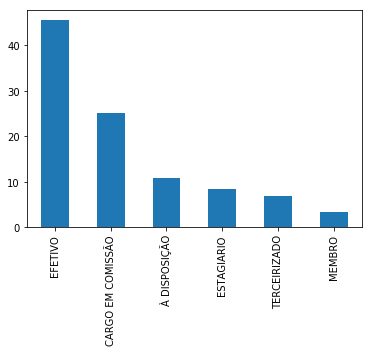

In [118]:
print(pessoas_tce['tipo_cargo'].value_counts(sort=True))
(pessoas_tce['tipo_cargo'].value_counts(sort=True, normalize=True)*100).plot.bar()

Podemos ver a partir de uma visão extratificada dos grupos de funcionários por tipo, vimos que o número de pessoas da casa, chamado de 'EFETIVO' (chamando de efetivo todos que fizeram concurso ou antes de CF.88) que é o grupo de maioria do TCE-RN.

NÃO    51.0
SIM    49.0
Name: DA_CASA, dtype: float64


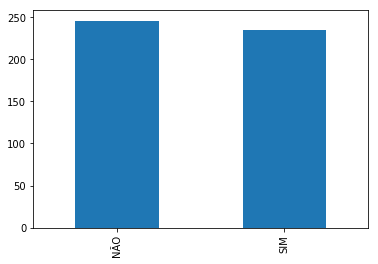

In [68]:
verfalso = {1:'SIM',0:'NÃO'}
pessoas_tce['DA_CASA']=pessoas_tce['DA_CASA'].replace(verfalso)
print(round(pessoas_tce['DA_CASA'].value_counts(sort=True, normalize=True),2)*100)
pessoas_tce['DA_CASA'].value_counts(sort=True).plot.bar()

In [86]:
pessoas_tce[['setor', 'subsetor','CARGO']].groupby(['setor', 'subsetor','CARGO'], sort=True)['CARGO'].size()


setor                                                  subsetor                                               CARGO                                    
APG                                                    APG                                                    ANALISTA CONTROLE EXTERNO                     2
                                                                                                              ASSESSOR TEC.CONT. E ADMINISTRAÇÃO            1
                                                                                                              ASSESSOR TÉCNICO JURÍDICO                     1
                                                                                                              ASSISTENTE DE INSPEÇÃO                        1
                                                                                                              ESTAGIARIO                                    1
                                                          

### Com relação ao gênero

##### Qual o gênero mais comun no TCE-RN?

Percentual de homens e mulhesres no TCE-RN
FEMININO     50.0
MASCULINO    50.0
Name: GENERO, dtype: float64


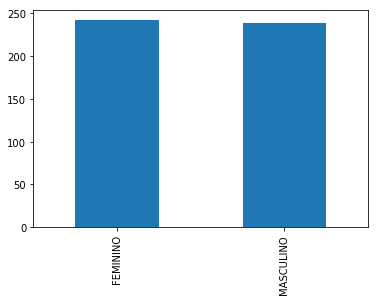

In [94]:
print('Percentual de homens e mulhesres no TCE-RN')
print(round(pessoas_tce['GENERO'].value_counts(sort=True, normalize=True),2)*100)
pessoas_tce['GENERO'].value_counts(sort=True).plot.bar()

In [95]:
pessoas_tce[['GENERO','CARGO']].groupby(['GENERO','CARGO'], sort=True)['GENERO'].size()

GENERO     CARGO                                                      
FEMININO   ANALISTA CONTROLE EXTERNO                                      23
           ASSESSOR DE GABINETE -                                          9
           ASSESSOR DE GABINETE - CC2                                      5
           ASSESSOR DE GABINETE - CC3                                     11
           ASSESSOR DE GABINETE - CC4                                     10
           ASSESSOR DE GABINETE - CC5                                     11
           ASSESSOR TEC.CONT. E ADMINISTRAÇÃO                             21
           ASSESSOR TECNICO EM INFORMATICA                                 1
           ASSESSOR TÉCNICO JURÍDICO                                       8
           ASSISTENTE DE CONTROLE E ADMINISTRAÇÃO                         21
           ASSISTENTE DE INSPEÇÃO                                         17
           ASSISTENTE SOCIAL                                               1
     

### Quantidade de funcionário por setor

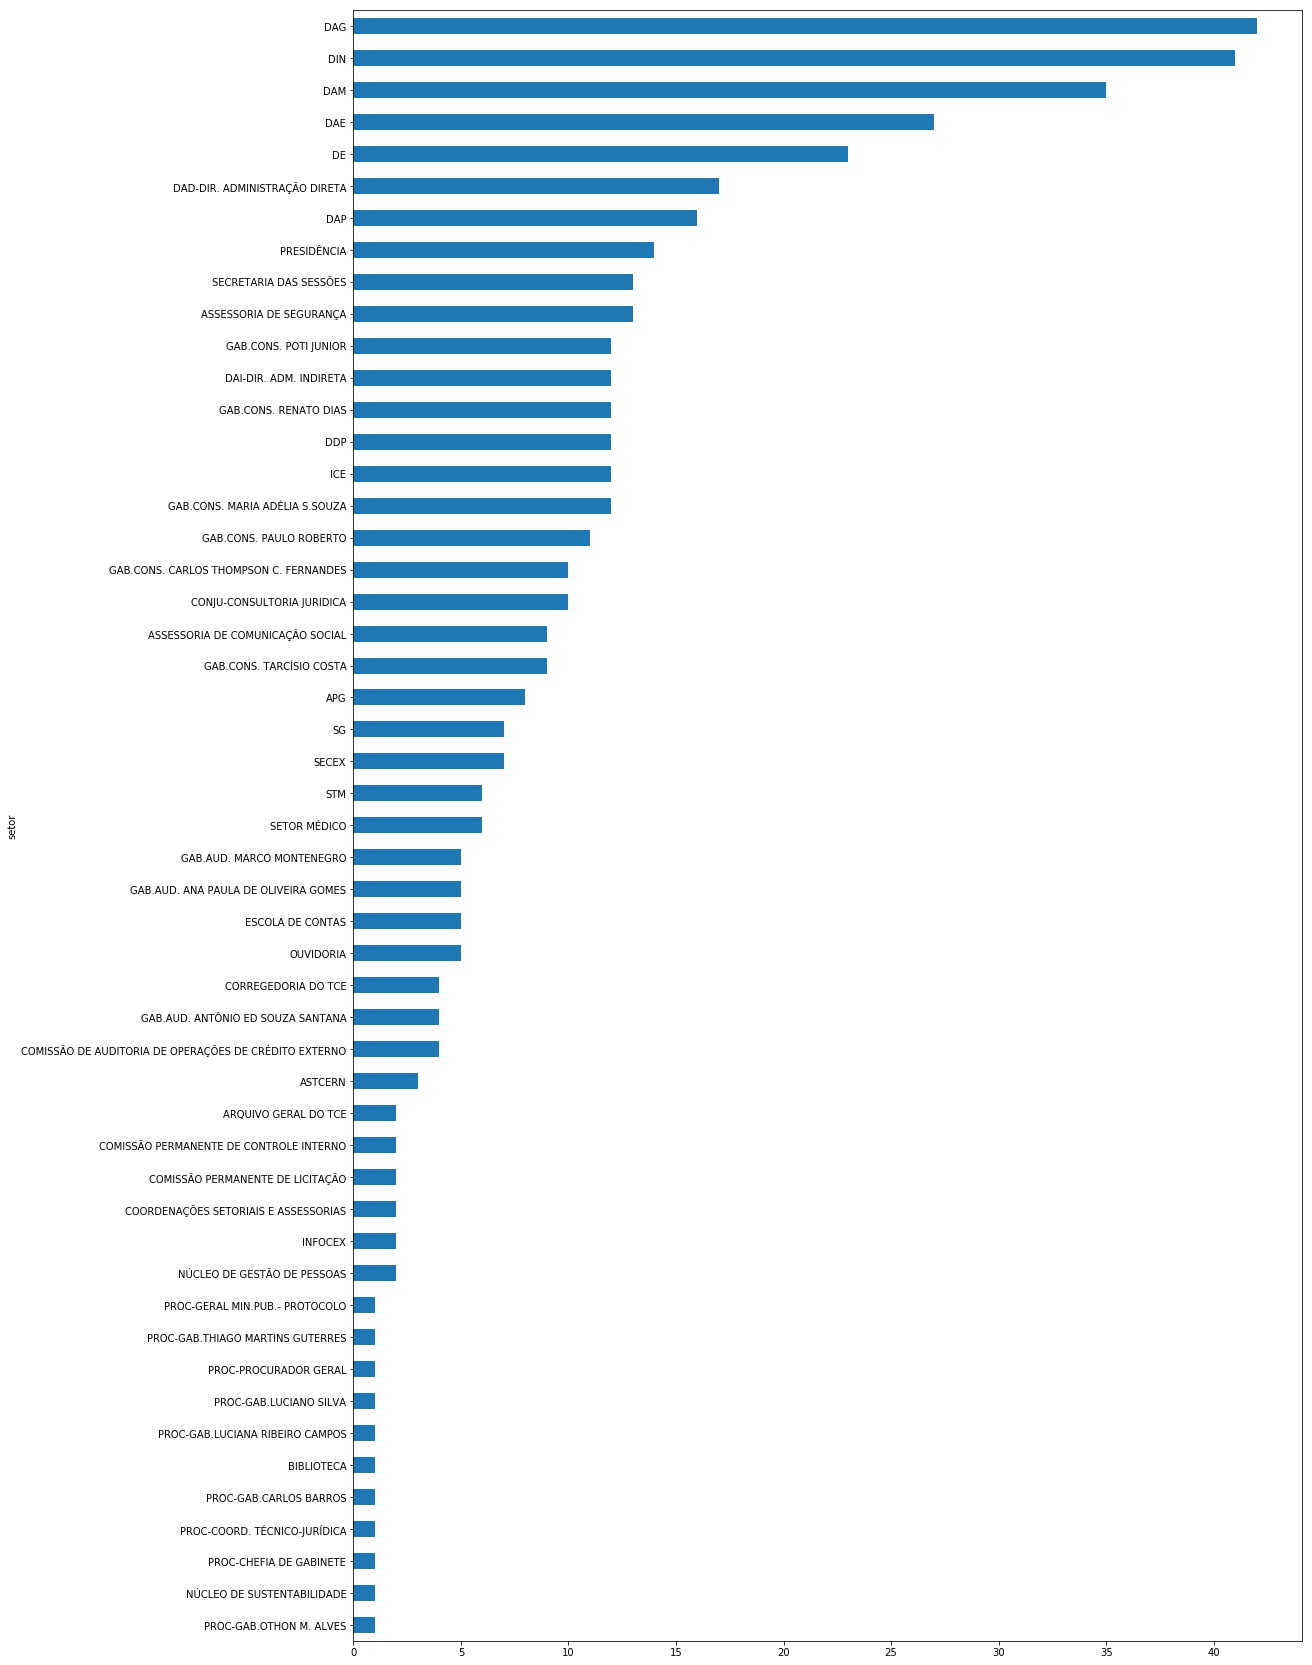

In [167]:
filter = pessoas_tce.groupby(['setor','GENERO'])['setor'].count().unstack('GENERO').fillna(0)
filter.sum(axis=1).sort_values().plot.barh(figsize=(17,30))

In [173]:
filter

GENERO,FEMININO,MASCULINO
setor,,
APG,6.0,2.0
ARQUIVO GERAL DO TCE,2.0,0.0
ASSESSORIA DE COMUNICAÇÃO SOCIAL,4.0,5.0
ASSESSORIA DE SEGURANÇA,1.0,12.0
ASTCERN,1.0,2.0
BIBLIOTECA,0.0,1.0
COMISSÃO DE AUDITORIA DE OPERAÇÕES DE CRÉDITO EXTERNO,1.0,3.0
COMISSÃO PERMANENTE DE CONTROLE INTERNO,1.0,1.0
COMISSÃO PERMANENTE DE LICITAÇÃO,1.0,1.0


#### A distribuição de funcionários por andar

,abs,freq
9,56,11.965812
1,52,11.111111
2,51,10.897436
6,40,8.547009
4,36,7.692308
3,35,7.478632
10,34,7.264957
11,32,6.837607
L,32,6.837607
5,30,6.410256


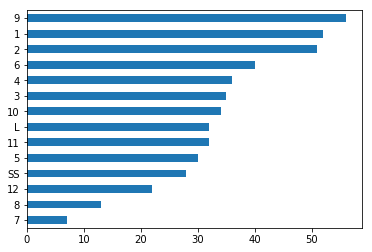

In [234]:
pessoas_tce['andar'].value_counts().sort_values().plot.barh()
contagem_pessoas_freq = pessoas_tce['andar'].sort_values().value_counts(normalize=True)*100
contagem_pessoas_abs =  pessoas_tce['andar'].sort_values().value_counts()
contagem_pessoas_ = {'freq':contagem_pessoas_freq,'abs':contagem_pessoas_abs}
contagem_pessoas = pd.DataFrame(data=contagem_pessoas_)

contagem_pessoas

Podemos ver que o 9º andar conta com a maior quantidade de pessoas por andar no TCE-RN. Colocando que a DIn, como visto em gráfico anterior, é a segunda Diretoria com maior quantidade de pessoas, e tem pouco mais de 50% de um andar (lembrando que a DAG é o maior setor e ocupa diversos andares e com uma parte (2º andar) bem maior que os demais andares) a DIn se torna o setor mais populacionalmente denso (o melhor não seria varificar de fato por área?). Enquanto que a média de pessoas por andar é de:

In [227]:
dicionario_andar = {'SS':-1,'L':0}
pessoal_completo['andar'] = pessoal_completo['andar'].replace(dicionario_andar)
pessoal_completo[['Remuneração_Liquida','andar']].groupby(['andar']).sum()

,Remuneração_Liquida
andar,
-1,70427.48
0,66517.48
1,202582.78
10,87286.39
11,147611.46
12,75336.29
2,222582.98
3,124910.34
4,169302.56


In [237]:
contagem_pessoas['andar'].replace(dicionario_andar)


KeyError: 'andar'

In [ ]:
Podemos realizar uma análise de distribuição por andar

### Distribuição de Gênero nos diversos setores

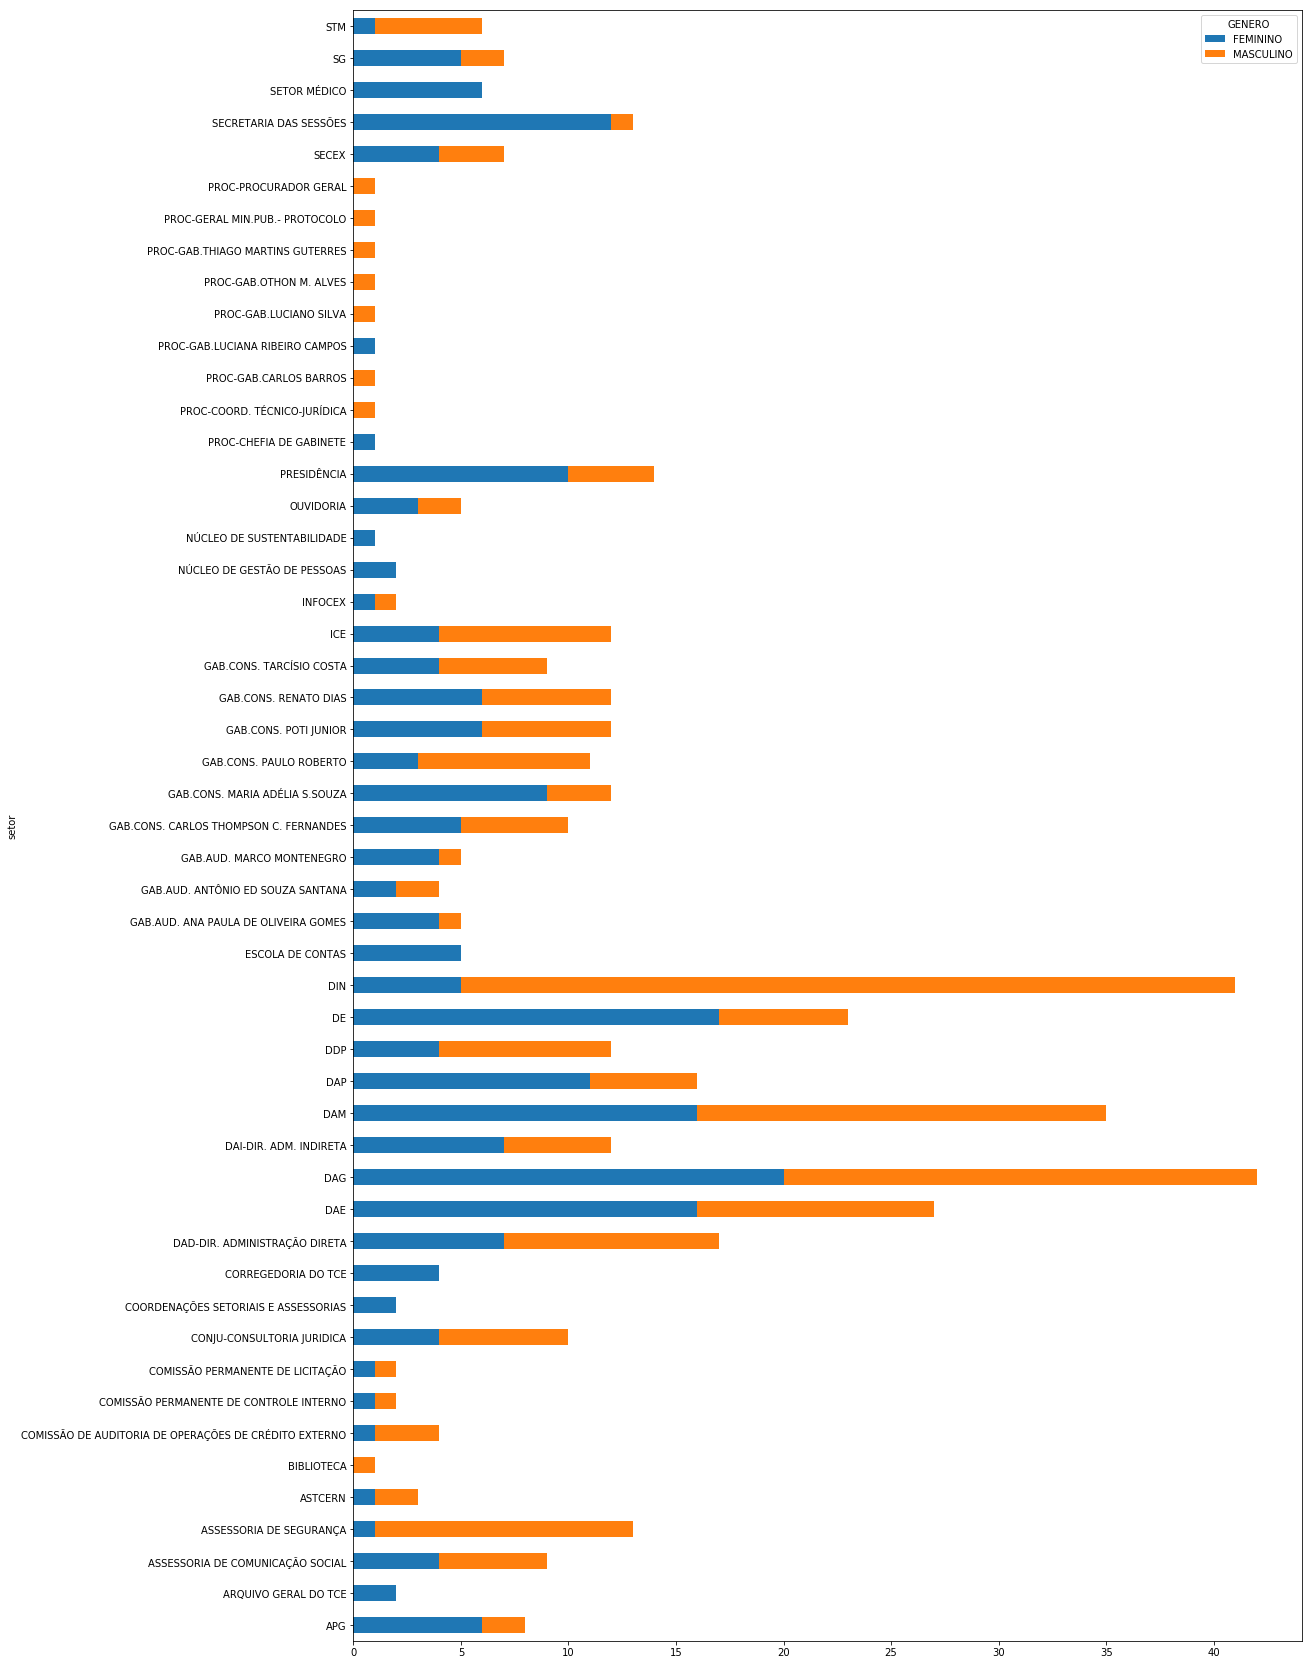

In [165]:
filter.plot.barh(stacked=True,figsize=(17,30))